In [136]:
# Useful starting lines
%matplotlib inline
import numpy as np
import os
import sys
from PIL import Image
import math
import re
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get train data

## Get groundtruth

### Functions

In [137]:
def load_data(path_file):
    """load data."""
    data = np.genfromtxt(
        path_file, delimiter=",", skip_header=1)
    y = np.genfromtxt(
        path_file, delimiter=",", skip_header=1, usecols=[1],dtype=str)
    return y

### Load data groundtruth

In [138]:
DATA_FOLDER = 'DATA/'
DATA_TRAIN = 'train_submission.csv'

y = load_data(DATA_FOLDER+DATA_TRAIN)
print(y[:10])
print(y.shape)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
(62500,)


## Get mean_data

In [139]:
mean_patches = []
for i in range(1, 101):
    image_filename = 'DATA/training/images/satImage_' + '%.3d' % i + '.png'
    
    img_number = int(re.search(r"\d+", image_filename).group(0))
    im = mpimg.imread(image_filename)
    patch_size = 16
    for j in range(0, im.shape[1], patch_size):
        for i in range(0, im.shape[0], patch_size):
            patch = im[i:i + patch_size, j:j + patch_size]
            mean_patch = np.mean(patch) #Get patch mean
            mean_patches.append(mean_patch)
            
            
print(len(mean_patches))
print(mean_patches[:10])

62500
[0.19116116, 0.19870813, 0.32159415, 0.36853552, 0.21805046, 0.3175756, 0.20872141, 0.20118976, 0.36087623, 0.253365]


## Normalization

#### Function

In [140]:
def standardize(x_list):
    mean = np.mean(x_list)
    std = np.std(x_list)
    for i in range(len(x_list)):
        x_list[i] = (x_list[i]-mean)/std
    return x_list

In [141]:
mean_patches = standardize(mean_patches)

print(len(mean_patches))
print(mean_patches[:10])
print(np.amax(mean_patches))

62500
[-1.0156374, -0.9559706, 0.0155737065, 0.38669503, -0.8030489, -0.016197154, -0.87680495, -0.9363507, 0.32614022, -0.52385]
5.291933


# Visualisation

## Function(s)

In [142]:
def segregate(x, y):
    x_1 = []
    x_0 = []
    for i in range(y.size):
        if y[i] == "1":
            x_1.append(x[i])
        else:
            x_0.append(x[i])

    return x_1, x_0

## Plot(s)

Number of y = 1:  16191
[Min, Max] mean_patch for y = 1:  [ -2.1575837 ,  3.3551013 ]
Number of y = 0:  46309
[Min, Max] mean_patch for y = 0:  [ -2.2508383 ,  5.291933 ]



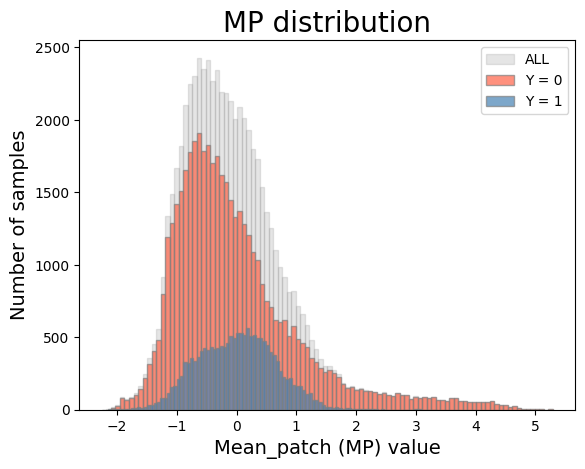

In [149]:
x = mean_patches

x_1, x_0 = segregate(x, y)

print("Number of y = 1: ", len(x_1))
print("[Min, Max] mean_patch for y = 1: ", "[", np.amin(x_1), ", ", np.amax(x_1), "]")

print("Number of y = 0: ", len(x_0))
print("[Min, Max] mean_patch for y = 0: ", "[", np.amin(x_0), ", ", np.amax(x_0), "]")

print()

plt.hist(x, label='ALL', alpha=.2, edgecolor='gray', color = "gray", bins = 100)
plt.hist(x_0, label='Y = 0', alpha=.7, edgecolor='gray', color = "tomato", bins = 100)
plt.hist(x_1, label='Y = 1', alpha=.7, edgecolor='gray', color = "steelblue", bins = 100)

plt.title('MP distribution',fontsize=20)
plt.xlabel('Mean_patch (MP) value',fontsize=14)
plt.ylabel('Number of samples',fontsize=14)

plt.legend()

plt.show

plt.savefig('MP_distribution.png')   